In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('Parkinsson disease.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [31]:
data.drop(columns=['name'], inplace=True)
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [32]:
data[data['status']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),48.0,181.937771,52.731067,110.739000,120.947500,198.996000,229.077000,260.105000
MDVP:Fhi(Hz),48.0,223.636750,96.727067,113.597000,139.413250,231.161500,251.239250,592.030000
MDVP:Flo(Hz),48.0,145.207292,58.757070,74.287000,98.243750,113.938500,199.183000,239.170000
MDVP:Jitter(%),48.0,0.003866,0.002055,0.001780,0.002655,0.003355,0.004530,0.013600
MDVP:Jitter(Abs),48.0,0.000023,0.000015,0.000007,0.000010,0.000025,0.000030,0.000080
MDVP:RAP,48.0,0.001925,0.001066,0.000920,0.001332,0.001625,0.001908,0.006240
MDVP:PPQ,48.0,0.002056,0.000943,0.001060,0.001480,0.001775,0.002228,0.005640
Jitter:DDP,48.0,0.005776,0.003199,0.002760,0.003998,0.004875,0.005725,0.018730
MDVP:Shimmer,48.0,0.017615,0.005544,0.009540,0.014475,0.016705,0.020210,0.040870
MDVP:Shimmer(dB),48.0,0.162958,0.057822,0.085000,0.129000,0.154000,0.189250,0.405000


### A better way to do the same for both healthy and affected individuals would be to use the _groupby()_ functionality. 

In [33]:
data.groupby('status').mean(numeric_only=True)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


## The important takeaway in such datasets is that the input features have different range of values. So _feature scaling_ becomes extremely crucial for training an accurate model

## Exploratory Data analysis

In [ ]:
sns.pairplot(data,hue="status", palette="husl")

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

MDVP:Fo(Hz) 0
MDVP:Fhi(Hz) 1
MDVP:Flo(Hz) 2
MDVP:Jitter(%) 3
MDVP:Jitter(Abs) 4
MDVP:RAP 5
MDVP:PPQ 6
Jitter:DDP 7
MDVP:Shimmer 8
MDVP:Shimmer(dB) 9
Shimmer:APQ3 10
Shimmer:APQ5 11
MDVP:APQ 12
Shimmer:DDA 13
NHR 14
HNR 15
RPDE 17
DFA 18
spread1 19
spread2 20
D2 21
PPE 22


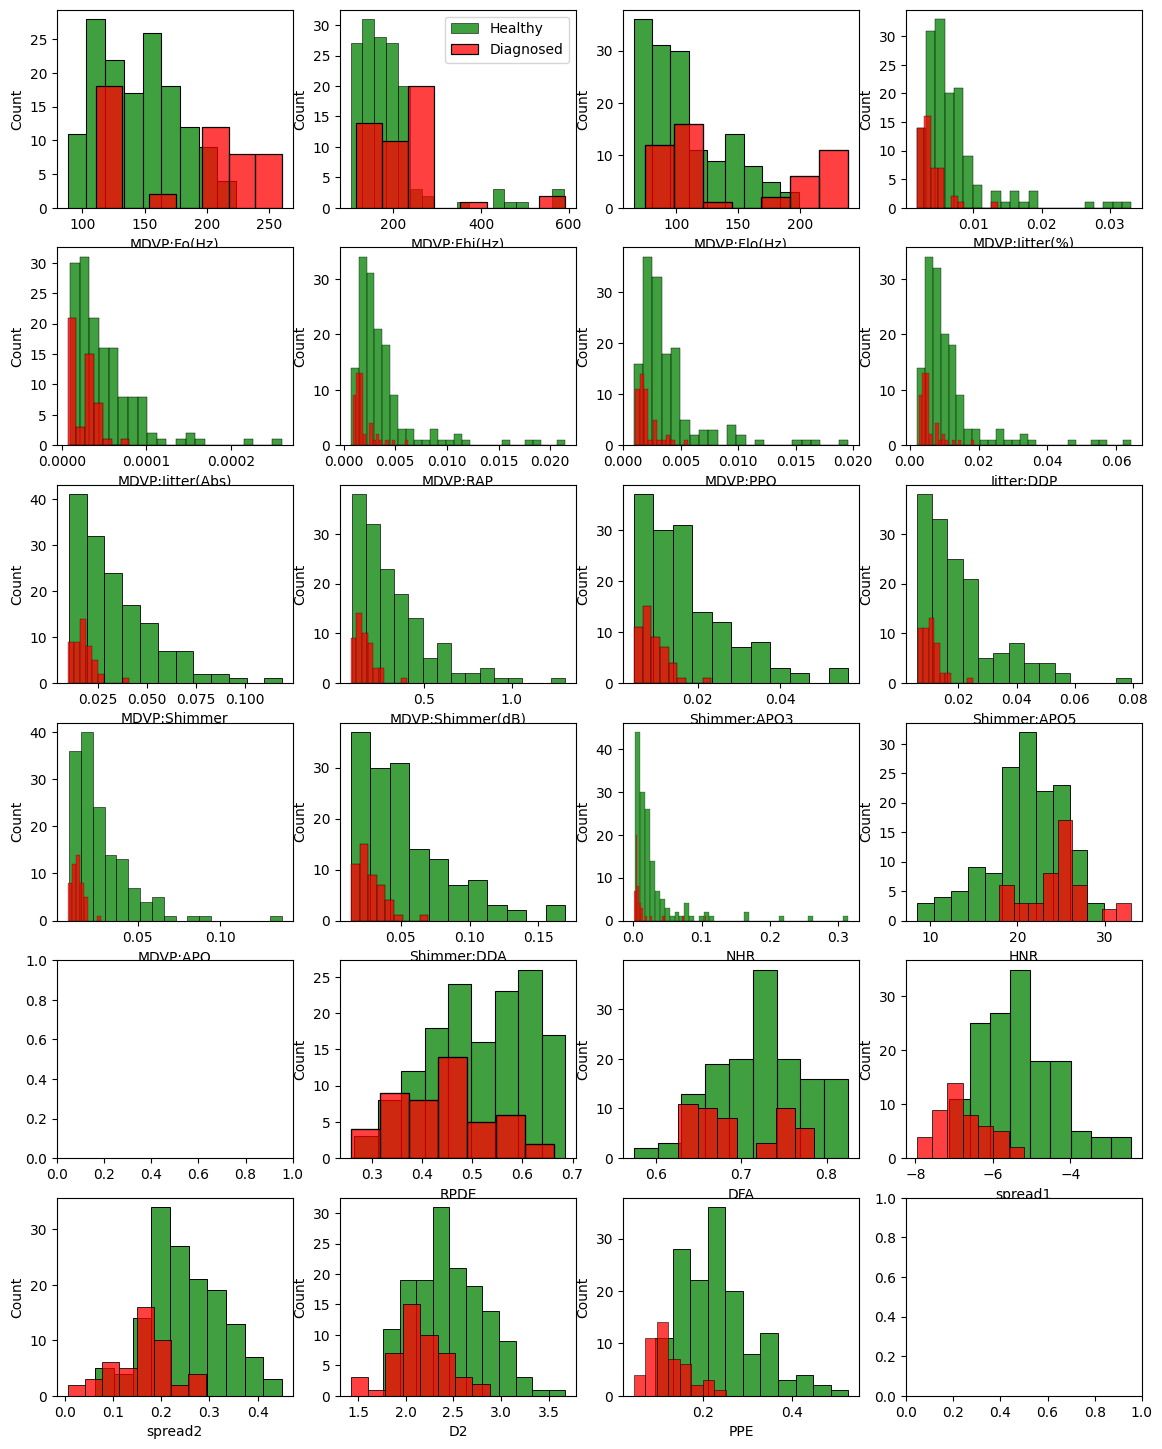

In [69]:
fig, ax = plt.subplots(6,4)
for i, col in enumerate(data.columns[:]):
    if col!='status':
        print(col, i)
        plt.subplot(6,4,i+1)
        sns.histplot(data[data['status']==1][col], color='green', label='Healthy')
        sns.histplot(data[data['status']==0][col], color='red', label='Diagnosed')
        if i == 1:
            plt.legend(loc='upper right')
        else:
            plt.legend().remove()
fig.set_size_inches((14,18))

In [72]:
corrM = data.corr()

In [93]:
corrM['status'].reset_index()

,index,status
0,MDVP:Fo(Hz),-0.383535
1,MDVP:Fhi(Hz),-0.166136
2,MDVP:Flo(Hz),-0.380200
3,MDVP:Jitter(%),0.278220
4,MDVP:Jitter(Abs),0.338653
5,MDVP:RAP,0.266668
6,MDVP:PPQ,0.288698
7,Jitter:DDP,0.266646
8,MDVP:Shimmer,0.367430
9,MDVP:Shimmer(dB),0.350697


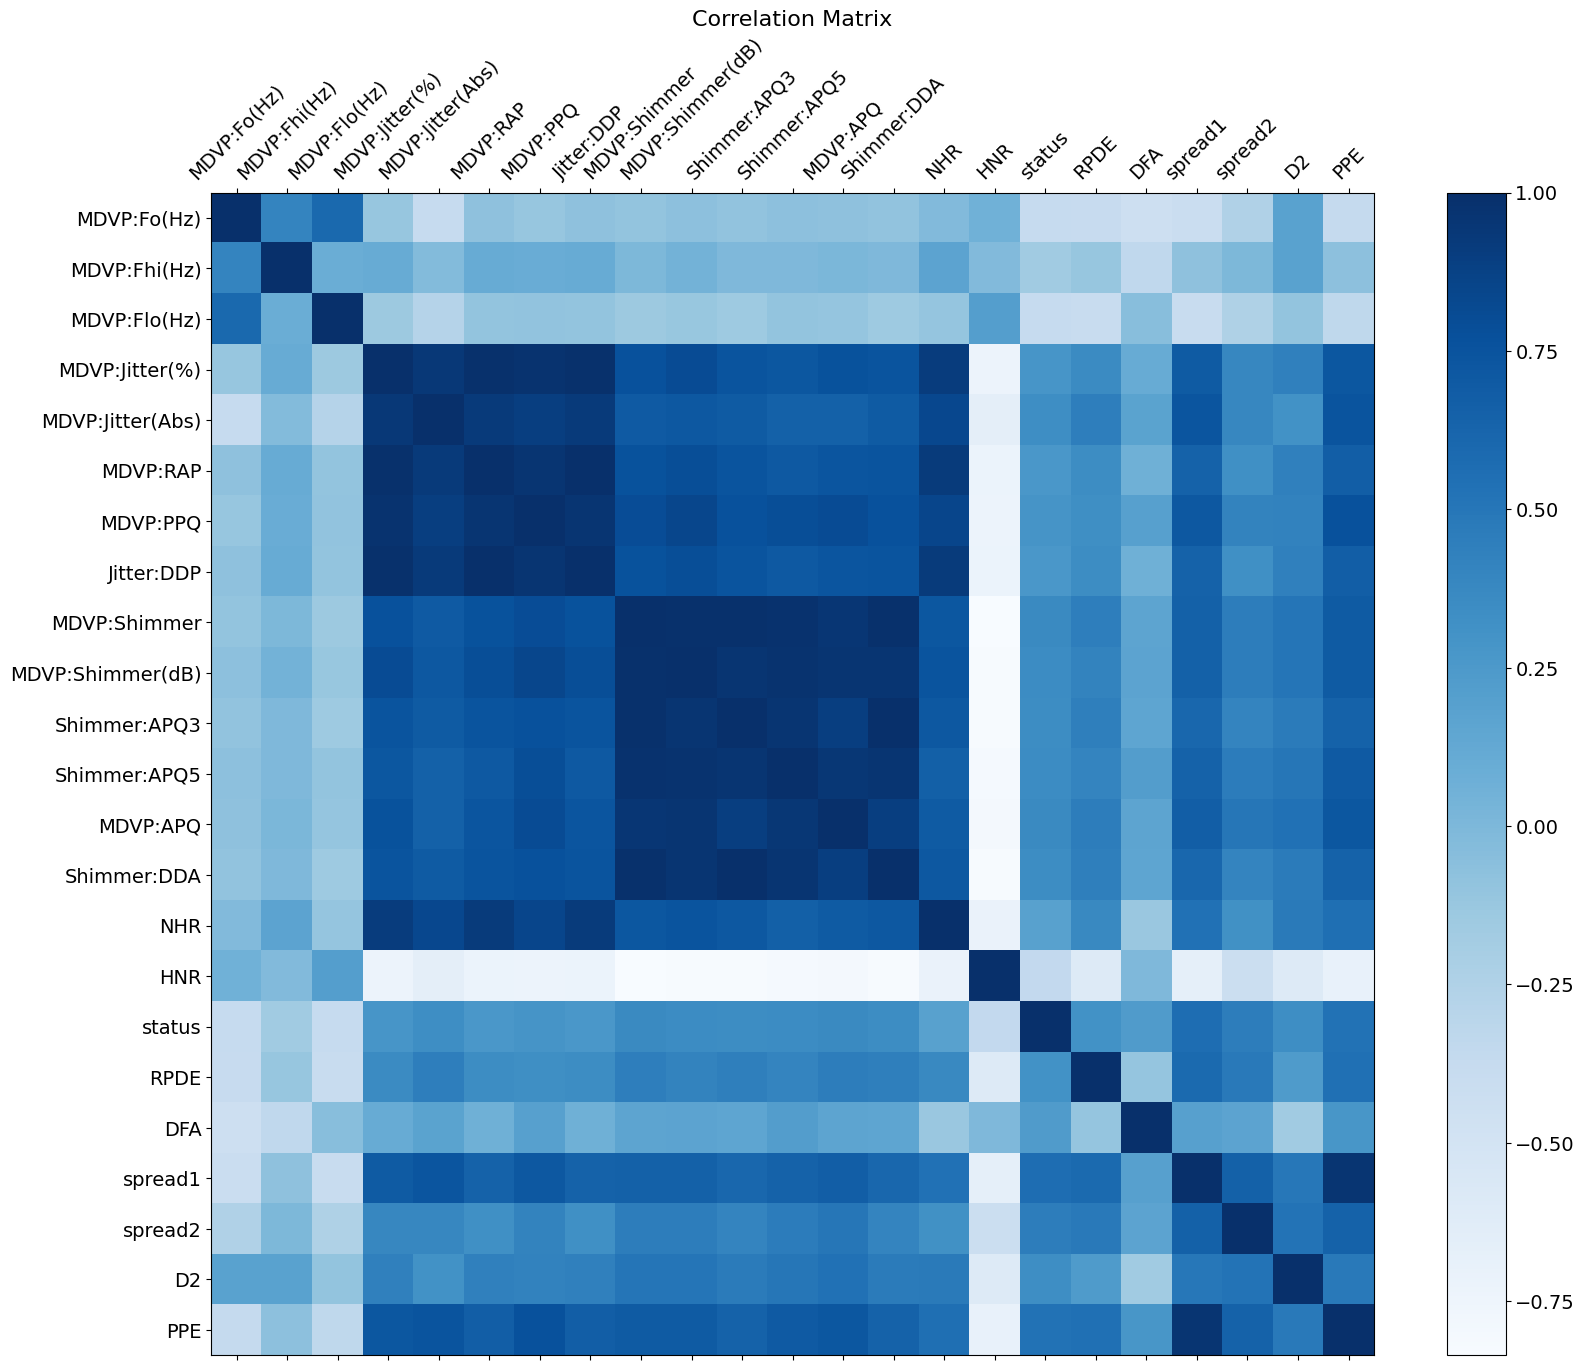

In [91]:
f = plt.figure(figsize=(19, 15))
# plt.imshow()
plt.matshow(data.corr(), fignum=f.number, cmap='Blues')
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [86]:
data.select_dtypes(['number']).shape[1]

23